In [160]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import base64
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr

# Open the NetCDF file
# file_path = '/mnt/c/Users/emgonz38/OneDrive - Arizona State University/ubuntu_files/work/code/git_repos/forks/nost-tools/examples/snow_observing_systems/input_data/Optimization/final_eta_combined_output_Gcom.nc'
# file_path = '/mnt/c/Users/emgonz38/OneDrive - Arizona State University/ubuntu_files/work/code/git_repos/forks/nost-tools/examples/snow_observing_systems/input_data/Efficiency_high_resolution_Caesium/efficiency_snow_cover_highest_resolution.nc'
file_path = '/mnt/c/Users/emgonz38/OneDrive - Arizona State University/ubuntu_files/work/code/git_repos/forks/nost-tools/examples/snow_observing_systems/input_data/Efficiency_high_resolution_Caesium/efficiency_resolution_layer_highest_resolution_1.nc'
# dataset = nc.Dataset(file_path, mode='r')
dataset = xr.open_dataset(file_path)
# dataset = dataset.time.isel(time=20)
# dataset.variables['spatial_ref']

In [164]:
dataset['spatial_ref']

<xarray.DataArray 'spatial_ref' ()> Size: 8B
[1 values with dtype=float64]
Coordinates:
    crs      int32 4B ...

In [161]:
dataset.variables['Monthly_Resolution_Abs'][0,:,:]

<xarray.Variable (y: 1526, x: 2859)> Size: 17MB
[4362834 values with dtype=float32]

In [162]:
raster_layer = dataset['Monthly_Resolution_Abs'].isel(month=0).values    
# Handle masked arrays
if np.ma.is_masked(raster_layer):
    raster_layer = raster_layer.filled(np.nan)

In [159]:
raster_layer

array([[0.9999938, 0.9999938, 0.9999938, ..., 0.9999938, 0.9999938,
        0.9999938],
       [0.9999938, 0.9999938, 0.9999938, ..., 0.9999938, 0.9999938,
        0.9999938],
       [0.9999938, 0.9999938, 0.9999938, ..., 0.9999938, 0.9999938,
        0.9999938],
       ...,
       [0.9999938, 0.9999938, 0.9999938, ..., 0.9999938, 0.9999938,
        0.9999938],
       [0.9999938, 0.9999938, 0.9999938, ..., 0.9999938, 0.9999938,
        0.9999938],
       [0.9999938, 0.9999938, 0.9999938, ..., 0.9999938, 0.9999938,
        0.9999938]], dtype=float32)

In [146]:
dataset['Weekly_Snow_Cover']

<xarray.DataArray 'Weekly_Snow_Cover' (week: 9, y: 255, x: 476)> Size: 4MB
[1092420 values with dtype=float32]
Coordinates:
  * x            (x) float64 4kB -113.9 -113.8 -113.8 ... -90.24 -90.19 -90.14
  * y            (y) float64 2kB 49.74 49.69 49.64 49.59 ... 37.14 37.09 37.04
    spatial_ref  int32 4B ...
  * week         (week) int64 72B 1 2 3 4 5 6 7 8 9

In [143]:
np.array(dataset['Weekly_Snow_Cover'].isel(week=3))

array([[9.99447167e-01, 1.00000000e+00, 1.00000000e+00, ...,
        4.53978682e-05, 3.05902262e-07, 2.75356906e-05],
       [1.09869428e-02, 9.89013076e-01, 9.99925137e-01, ...,
        3.05902262e-07, 6.14417513e-06, 6.14417513e-06],
       [1.19202934e-01, 1.37095708e-06, 3.05902262e-07, ...,
        3.05902262e-07, 2.26032444e-06, 3.05902262e-07],
       ...,
       [1.01299911e-05, 3.05902262e-07, 3.05902262e-07, ...,
        3.05902262e-07, 3.05902262e-07, 3.05902262e-07],
       [3.05902262e-07, 1.37095708e-06, 3.05902262e-07, ...,
        3.05902262e-07, 3.05902262e-07, 3.05902262e-07],
       [3.05902262e-07, 3.05902262e-07, 3.05902262e-07, ...,
        3.05902262e-07, 3.05902262e-07, 3.05902262e-07]], dtype=float32)

In [131]:
dataset['Monthly_Resolution_Abs'].isel(month=0)

<xarray.DataArray 'Monthly_Resolution_Abs' (y: 1526, x: 2859)> Size: 17MB
[4362834 values with dtype=float32]
Coordinates:
    crs          int32 4B ...
  * x            (x) float64 23kB -113.9 -113.9 -113.9 ... -90.14 -90.13 -90.12
  * y            (y) float64 12kB 49.74 49.73 49.72 49.71 ... 37.05 37.04 37.03
    spatial_ref  int32 4B ...
    month        int64 8B 1

In [129]:
dataset['Weekly_Snow_Cover']#.isel(week=1)

KeyError: "No variable named 'Weekly_Snow_Cover'. Variables on the dataset include ['crs', 'x', 'y', 'spatial_ref', 'time', 'month', 'Monthly_Resolution_Abs']"

In [111]:
dataset['Monthly_Resolution_Abs'].

# dataset['final_eta_result'].isel(time=1)#[0, :, :]

<xarray.DataArray 'Monthly_Resolution_Abs' (y: 1526, x: 2859)> Size: 17MB
[4362834 values with dtype=float32]
Coordinates:
    crs          int32 4B ...
  * x            (x) float64 23kB -113.9 -113.9 -113.9 ... -90.14 -90.13 -90.12
  * y            (y) float64 12kB 49.74 49.73 49.72 49.71 ... 37.05 37.04 37.03
    spatial_ref  int32 4B ...
    month        int64 8B 1

In [91]:
# dataset['Weekly_Snow_Cover']

In [79]:
dataset['Weekly_Snow_Cover'][0, :, :]

<xarray.DataArray 'Weekly_Snow_Cover' (y: 255, x: 476)> Size: 486kB
[121380 values with dtype=float32]
Coordinates:
  * x            (x) float64 4kB -113.9 -113.8 -113.8 ... -90.24 -90.19 -90.14
  * y            (y) float64 2kB 49.74 49.69 49.64 49.59 ... 37.14 37.09 37.04
    spatial_ref  int32 4B ...
    week         int64 8B 1

In [75]:
dataset.spatial_ref.GeoTransform.splot()

AttributeError: 'str' object has no attribute 'splot'

In [38]:
dataset.time.isel(time=1).values

# 2024-01-21
# Hadis time: 1
# Divya time: 21

np.datetime64('2024-01-01T00:00:00.000000000')

In [43]:
dataset['Day_CMG_Snow_Cover'].isel(time=1)

KeyError: "No variable named 'final_eta_result'. Variables on the dataset include ['x', 'y', 'time', 'spatial_ref', 'Day_CMG_Snow_Cover']"

In [4]:
# Extract snow cover
snow_cover = dataset.variables['Day_CMG_Snow_Cover'][0, :, :]

# Convert the array to bytes and encode the bytes in base64
snow_cover_bytes = snow_cover.tobytes()
snow_cover_base64 = base64.b64encode(snow_cover_bytes).decode('utf-8')

# Decode the base64 string back to bytes
decoded_bytes = base64.b64decode(snow_cover_base64)
decoded_array = np.frombuffer(decoded_bytes, dtype=snow_cover.dtype).reshape(snow_cover.shape)

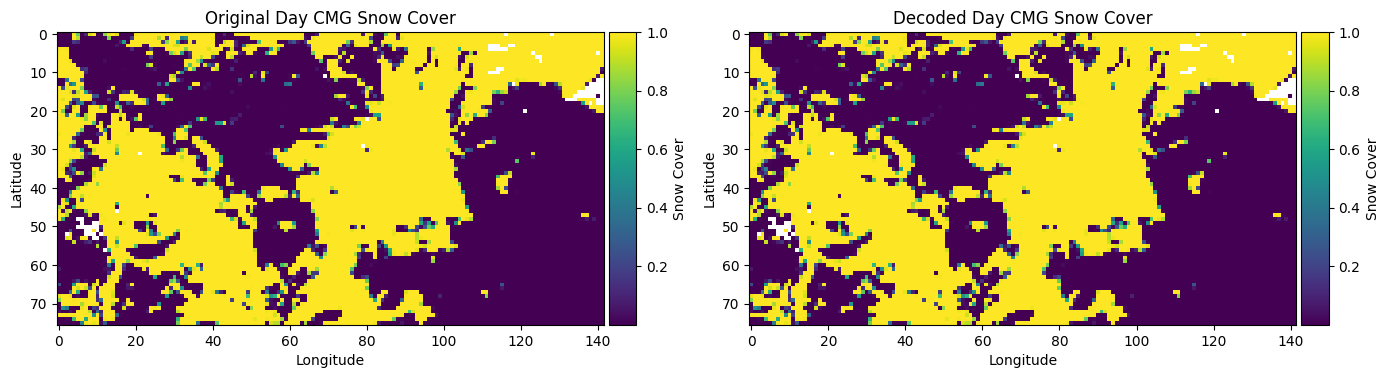

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot the original snow cover
im0 = axes[0].imshow(snow_cover, cmap='viridis')
axes[0].set_title('Original Day CMG Snow Cover')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

# Adjust the colorbar to be shorter
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax0, label='Snow Cover')
# fig.colorbar(axes[0].images[0], ax=axes[0], label='Snow Cover')

# Plot the decoded snow cover
im = axes[1].imshow(decoded_array, cmap='viridis')
axes[1].set_title('Decoded Day CMG Snow Cover')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
# Adjust the colorbar to be shorter

divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax, label='Snow Cover')

plt.tight_layout()
plt.show()

In [13]:
# # Plot the variable as an image
# plt.imshow(snow_cover, cmap='viridis')
# plt.colorbar(label='Snow Cover')
# plt.title('Day CMG Snow Cover')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()





# # Plot the decoded array as an image
# plt.imshow(decoded_array, cmap='viridis')
# plt.colorbar(label='Snow Cover')
# plt.title('Decoded Day CMG Snow Cover')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()